https://github.com/czhuang/JSB-Chorales-dataset

In [2]:

import pickle
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from utils import *
from generate import *

# First, make sure you have the source modules available
# Option 1: If running in same directory as src/
import sys
sys.path.append('.')


def load_original_data():
    """Load the original Bach chorales dataset"""
    try:
        with open('./data/jsb-chorales-16th.pkl', 'rb') as file:
            midi_data = pickle.load(file, encoding="latin1")
        print("✅ Loaded original Bach chorales dataset")
        return midi_data
    except FileNotFoundError:
        print("❌ Original dataset not found at './data/jsb-chorales-16th.pkl'")
        print("Please ensure you have the original Bach chorales dataset file.")
        raise

midi_data = load_original_data()

print(f"Original dataset:")
print(f"  Train: {len(midi_data['train'])} songs")
print(f"  Test: {len(midi_data['test'])} songs")
print(f"  Valid: {len(midi_data['valid'])} songs")

✅ Loaded original Bach chorales dataset
Original dataset:
  Train: 229 songs
  Test: 77 songs
  Valid: 76 songs


Dataset Statistics:
  Total songs: 382
  Average song length: 242.2 time steps
  Note range: 36 to 81
  Total notes: 368860


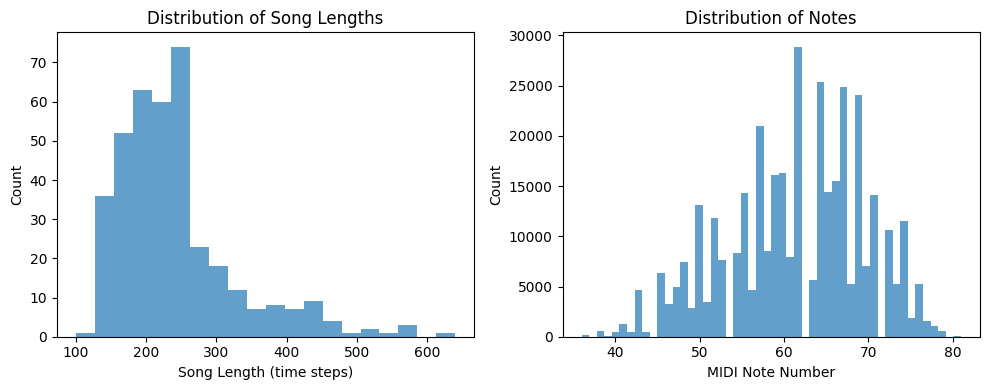

In [3]:
stats = analyze_dataset(midi_data)

In [4]:
sample_song = midi_data['train'][0]
sample_note_info = generate_note_info(sample_song)

print(f"\n🎵 Note Info Conversion Test:")
voice_names = ['Soprano', 'Alto', 'Tenor', 'Bass']
for i, voice_notes in enumerate(sample_note_info):
    print(f"  {voice_names[i]}: {len(voice_notes)} notes")
    if voice_notes:
        print(f"    First note: {voice_notes[0]}")


🎵 Note Info Conversion Test:
  Soprano: 34 notes
    First note: NoteInfo(beat=0.0, pitch=74, length=1.0)
  Alto: 30 notes
    First note: NoteInfo(beat=0.0, pitch=70, length=2.0)
  Tenor: 34 notes
    First note: NoteInfo(beat=0.0, pitch=65, length=1.0)
  Bass: 49 notes
    First note: NoteInfo(beat=0.0, pitch=58, length=1.0)


In [5]:
sample_augmentations = augment_song_data(sample_note_info)
print(f"\n🔄 Augmentation Test:")
print(f"  Original song generated {len(sample_augmentations)} augmented versions")
print(f"  Expected: 12 scales × 4 note variations = 48 versions")


🔄 Augmentation Test:
  Original song generated 48 augmented versions
  Expected: 12 scales × 4 note variations = 48 versions


In [7]:
generate_midi_file(sample_note_info, 'test.mid')

Created track for Soprano with 34 notes
Created track for Alto with 30 notes
Created track for Tenor with 34 notes
Created track for Bass with 49 notes
MIDI file saved: generated_midi/test.mid


'generated_midi/test.mid'

In [6]:
sample_tuple_reconstruction = generate_tuple_form(sample_note_info)
print(f"\n🔄 Tuple Reconstruction Test:")
print(f"  Original song length: {len(sample_song)} time steps")
print(f"  Reconstructed length: {len(sample_tuple_reconstruction)} time steps")
print(f"  Original first chord: {sample_song[0]}")
print(f"  Reconstructed first chord: {sample_tuple_reconstruction[0]}")

🔍 Debug: last_pos = 46.0
🔍 Debug: expected steps = 184.0
  Step 1: pos=0.00, notes=(74, 70, 65, 58)
  Step 2: pos=0.25, notes=(74, 70, 65, 58)
  Step 3: pos=0.50, notes=(74, 70, 65, 58)
  Step 4: pos=0.75, notes=(74, 70, 65, 58)
  Step 5: pos=1.00, notes=(75, 70, 58, 55)
  Step 50: pos=12.25, notes=(72, 67, 58, 51)
  Step 100: pos=24.75, notes=(75, 67, 60, 60)
  Step 150: pos=37.25, notes=(74, 65, 58, 46)
🔍 Debug: generated 184 steps

🔄 Tuple Reconstruction Test:
  Original song length: 192 time steps
  Reconstructed length: 184 time steps
  Original first chord: (np.int64(74), np.int64(70), np.int64(65), np.int64(58))
  Reconstructed first chord: (74, 70, 65, 58)


In [6]:
augmented_midi_data = augment_full_dataset(midi_data)

🚀 Starting full dataset augmentation...
  Augmenting song 10 of 229 songs
  Augmenting song 20 of 229 songs
  Augmenting song 30 of 229 songs
  Augmenting song 40 of 229 songs
  Augmenting song 50 of 229 songs
  Augmenting song 60 of 229 songs
  Augmenting song 70 of 229 songs
  Augmenting song 80 of 229 songs
  Augmenting song 90 of 229 songs
  Augmenting song 100 of 229 songs
  Augmenting song 110 of 229 songs
  Augmenting song 120 of 229 songs
  Augmenting song 130 of 229 songs
  Augmenting song 140 of 229 songs
  Augmenting song 150 of 229 songs
  Augmenting song 160 of 229 songs
  Augmenting song 170 of 229 songs
  Augmenting song 180 of 229 songs
  Augmenting song 190 of 229 songs
  Augmenting song 200 of 229 songs
  Augmenting song 210 of 229 songs
  Augmenting song 220 of 229 songs

✅ Augmentation completed!
  Original training songs: 229
  Augmented training songs: 10992
  Augmentation factor: 48.0x


In [ ]:
output_file = save_augmented_dataset(augmented_midi_data)


verify_saved_data(output_file)

print("\n" + "="*70)
print("🎉 COMPLETE AUGMENTATION PIPELINE FINISHED!")
print("="*70)
print(f"\n📁 Generated file: ./data/scales_note_join_augmented.pkl")

💾 Augmented dataset saved to: ./data/scales_note_join_augmented.pkl
  File size: 30.1 MB

🔍 Verifying saved data...
✅ Successfully loaded augmented dataset
  Train: 10992 songs
  Test: 77 songs
  Valid: 76 songs
  Sample song length: 184 time steps
  Sample first chord: (69, 65, 60, 53)

🎉 COMPLETE AUGMENTATION PIPELINE FINISHED!

📁 Generated file: ./data/scales_note_join_augmented.pkl
